# Importing dataset from Kaggle + Unzip the folders

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parul28chutani","key":"9c60a932f1323a84550f04e21add8c5d"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl

 97% 273M/281M [00:01<00:00, 148MB/s]
100% 281M/281M [00:02<00:00, 146MB/s]


In [ ]:
from zipfile import ZipFile
isl = "/content/indian-sign-language-isl.zip"
with ZipFile(isl,'r') as zip:
  zip.extractall();
  print("Dataset uploaded successfully !!!")

Dataset uploaded successfully !!!


# **Collecting the dataset**


### **Fetching all images**

In [ ]:
from glob import glob

In [ ]:
images = glob('/content/Indian/*/*.jpg', recursive=True)

In [ ]:
images[42000]

'/content/Indian/O/199 copy.jpg'

### **Fetching Images and corresponsing Labels**

In [ ]:
unique_labels = []

total_images = []
folder_labels = []
images = glob('/content/Indian/*/*.jpg', recursive=True)

for image in images:
  total_images.append(image)

  label = image.split('/')[-2]
  folder_labels.append(label)

  if label not in unique_labels:
    unique_labels.append(label)

In [ ]:
numerical_folder_labels=[]
for label in folder_labels:
  # print(type(label))
  # print(label)
  numerical_folder_labels.append(unique_labels.index(label))



print(numerical_folder_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(len(folder_labels))
print(len(total_images))
print(unique_labels)
print(len(unique_labels))

42745
42745
['6', 'S', '1', 'Q', 'J', 'V', 'G', 'H', 'T', 'Z', 'A', '2', 'P', '4', '5', 'R', 'D', '9', '7', 'I', 'Y', 'K', '3', 'N', 'M', '8', 'W', 'B', 'F', 'C', 'L', 'U', 'E', 'X', 'O']
35


# Train-Test Split

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio('/content/Indian', 
                   output = 'ISL',
                   seed = 22, ratio = (.7,.2,.1))

Copying files: 42745 files [00:05, 7918.58 files/s]


In [ ]:
# converting RGB to grayscale images and storing the result in the same folder structure
import cv2
from skimage import io
import os
import shutil
folder_list = ['/content/ISL/train', '/content/ISL/val']

for current_folder in folder_list:
  main_folder = current_folder
  for image_folder in os.listdir(main_folder):
    internal_folder = os.path.join(main_folder, image_folder)
    for image in os.listdir(internal_folder):
      image_path = os.path.join(internal_folder, image)

      # read image
      frame = cv2.imread(image_path)  

      # convert image to grayscale     
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

      # apply gaussian blur to the image
      blur = cv2.GaussianBlur(gray,(5,5),2)
      
      # apply boundary to the actual character in the image
      th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

      ret, res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

      # replace the existing colored image with above filtered image in the same location    
      if os.path.exists(image_path):
        os.remove(image_path)
      cv2.imwrite(image_path, res)


## Data Augmentation

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data augmentation step
training_data_generator = ImageDataGenerator(rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,
                                             validation_split=0.2,
                                             rescale = 1/255)

test_data_generation = ImageDataGenerator(rescale=1/255)

In [ ]:


train_generator = training_data_generator.flow_from_directory('/content/ISL/train', 
                                                               target_size=(150, 150), 
                                                               batch_size=20,
                                                               class_mode='binary')

validation_generator = training_data_generator.flow_from_directory('/content/ISL/val',
                                                                target_size=(150, 150),
                                                                batch_size=20,
                                                                class_mode='binary')
test_generator = test_data_generation.flow_from_directory('/content/ISL/test',
                                                                target_size=(150, 150),
                                                                batch_size=20,
                                                                class_mode='binary')

Found 29919 images belonging to 35 classes.
Found 8547 images belonging to 35 classes.
Found 4279 images belonging to 35 classes.


# Visualising the images

In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),2)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
rm = cv2.imread('/content/Indian/A/10.jpg')

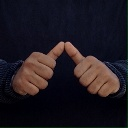

In [ ]:
cv2_imshow(rm)

In [ ]:
train_images,train_labels = train_generator.next()

print(len(train_images))
for i in range(0,5):
    image = train_images[i]
    print(train_images[i])
    imshow(image)

# **Creating Model & Training the model**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from time import time

In [ ]:
model = Sequential()
model.add(Conv2D(150, (3, 3), input_shape=( 150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(200, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(215, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(190, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(300))
model.add(Activation('relu'))

model.add(Dense(35))
model.add(Activation('sigmoid'))

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 150)     4200      
                                                                 
 activation (Activation)     (None, 148, 148, 150)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 150)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 200)       270200    
                                                                 
 activation_1 (Activation)   (None, 72, 72, 200)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 200)      0         
 2D)                                                    

In [ ]:
r = model.fit_generator(
        train_generator,
        #steps_per_epoch=18631 // batch_size,
        epochs=2,
        validation_data=validation_generator,
        #validation_steps=10119 // batch_size
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1496/1496 [==============================] - 259s 165ms/step - loss: 0.7942 - accuracy: 0.7592 - val_loss: 0.1266 - val_accuracy: 0.9612
Epoch 2/2
1496/1496 [==============================] - 240s 161ms/step - loss: 0.0966 - accuracy: 0.9670 - val_loss: 0.0468 - val_accuracy: 0.9825


In [ ]:
model.save('custom_model.h5')

# Prediction for a single image

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/ISL/test/S/1043.jpg', target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)


In [ ]:
result

array([[0.00164355, 0.00694881, 0.0029307 , 0.00583335, 0.32671502,
        0.03429116, 0.15901543, 0.2557503 , 0.05500993, 0.00723704,
        0.39539573, 0.19583853, 0.5743342 , 0.34980863, 0.71175444,
        0.01789128, 0.02226823, 0.03968102, 0.9329751 , 0.06817631,
        0.8102082 , 0.003091  , 0.01573373, 0.24767712, 0.7845784 ,
        0.30526552, 0.00917989, 0.01985132, 0.43071744, 0.33740085,
        0.00508184, 0.08110119, 0.00631808, 0.02187119, 0.6092848 ]],
      dtype=float32)

In [ ]:
result.shape

(1, 35)

In [ ]:
np.amax(result)

0.9329751

In [ ]:

max_value_index = np.where(result == np.amax(result))

shape_of_arr = result.shape

columns = shape_of_arr[1]

# total values ie (max value's row * columns) + (row number it has parsed) + (1 as its zero indexing, so on checking it can be skipped)

index_of_max_value = (max_value_index[0][0] * columns) + max_value_index[1][0] 

In [ ]:
max_value_index

(array([0]), array([18]))

In [ ]:
index_of_max_value

18

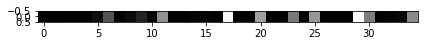

In [ ]:
io.imshow(result)

In [ ]:
test_image

array([[[[0.15294118, 0.14117648, 0.20784314],
         [0.16078432, 0.15294118, 0.20784314],
         [0.16470589, 0.15686275, 0.21176471],
         ...,
         [0.13333334, 0.14509805, 0.17254902],
         [0.07843138, 0.13725491, 0.11764706],
         [0.14509805, 0.23137255, 0.18039216]],

        [[0.14509805, 0.13725491, 0.19215687],
         [0.16470589, 0.15686275, 0.21176471],
         [0.17254902, 0.16470589, 0.21960784],
         ...,
         [0.10980392, 0.12156863, 0.14901961],
         [0.07843138, 0.13725491, 0.11764706],
         [0.14901961, 0.23529412, 0.18431373]],

        [[0.13333334, 0.1254902 , 0.18039216],
         [0.15686275, 0.14901961, 0.20392157],
         [0.16470589, 0.15686275, 0.21176471],
         ...,
         [0.10588235, 0.11764706, 0.14509805],
         [0.08235294, 0.14117648, 0.12156863],
         [0.14901961, 0.23529412, 0.1882353 ]],

        ...,

        [[0.04313726, 0.05490196, 0.08235294],
         [0.03921569, 0.05098039, 0.07843138]

In [ ]:
classes = train_generator.class_indices

In [ ]:
classes

{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 '6': 5,
 '7': 6,
 '8': 7,
 '9': 8,
 'A': 9,
 'B': 10,
 'C': 11,
 'D': 12,
 'E': 13,
 'F': 14,
 'G': 15,
 'H': 16,
 'I': 17,
 'J': 18,
 'K': 19,
 'L': 20,
 'M': 21,
 'N': 22,
 'O': 23,
 'P': 24,
 'Q': 25,
 'R': 26,
 'S': 27,
 'T': 28,
 'U': 29,
 'V': 30,
 'W': 31,
 'X': 32,
 'Y': 33,
 'Z': 34}

In [ ]:
cv2.imread(result)

TypeError: ignored

#### Taking input images from webcam